# DATA EXPLORATION

## Introduction:

For my data exploration, I wanted to find a way to see my sentiment of private messages compared to that of my public timeline posts. My hypothesis was that my timeline (public) posts would be more positive on average than my messages (private). In order to do this, I needed to first find out which method I would use to perform sentiment analysis on my raw text. I narrowed it down to the Watson Sentiment Analysis API and the VADER sentiment analysis from the nltk python package. After careful deliberation, I decided to use nltk VADER because I was able to not only obtain a composite score for all of my text, but also a negative, neutral, and positive score.

In [1]:
import pickle
messages = pickle.load(open("messages.pkl", "rb"))
timeline = pickle.load(open("timeline.pkl", "rb"))

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
sid = SentimentIntensityAnalyzer()
temp = messages.iloc[1]["Text"]
ss = sid.polarity_scores(temp)

/opt/conda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
compoundData = []
negData = []
neuData = []
posData = []

for row in range(len(messages)):
    text = messages.iloc[row]["Text"]
    ss = sid.polarity_scores(text)
    compoundData.append(ss["compound"])
    negData.append(ss["neg"])
    neuData.append(ss["neu"])
    posData.append(ss["pos"])

In [4]:
messages["compound_score"] = compoundData
messages["neg_score"] = negData
messages["neu_score"] = neuData
messages["pos_score"] = posData

In [5]:
compoundData = []
negData = []
neuData = []
posData = []

for row in range(len(timeline)):
    text = timeline.iloc[row]["Text"]
    ss = sid.polarity_scores(text)
    compoundData.append(ss["compound"])
    negData.append(ss["neg"])
    neuData.append(ss["neu"])
    posData.append(ss["pos"])

timeline["compound_score"] = compoundData
timeline["neg_score"] = negData
timeline["neu_score"] = neuData
timeline["pos_score"] = posData

In [6]:
timeline.head()

,Year,Month,Day,Time,Text,Hour,Minutes,compound_score,neg_score,neu_score,pos_score
0,2017,May,16,10:48,If anyone wants to see some awesome kids hitti...,10,48,0.9430,0.0,0.732,0.268
1,2017,May,7,5:39,Just wanted to share that today at 12:45pm Eas...,5,39,0.9827,0.0,0.638,0.362
2,2017,May,4,14:13,So I took a photo of a dog in my chem lab and ...,2,13,0.4215,0.0,0.912,0.088
3,2017,April,30,23:21,Can't wait for this weekend! Let's go Poly Pol...,11,21,0.5399,0.0,0.721,0.279
4,2017,April,14,12:11,"Margarita is ready for tomorrow, are you?",12,11,0.3612,0.0,0.706,0.294


### Primary Analysis:
I initially thought the best idea would be to chart the compound_score for every single message and timeline post that I had in my data frames against eachother to see the difference between the two. But, as you can see it the code and graph below, I learned that it was almost impossible to analyze the visuals because there were too many data points for me to understand what was actually happening.

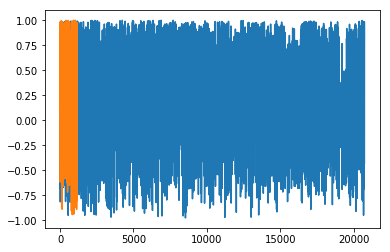

In [7]:
y_1 = messages["compound_score"]
y_2 = timeline["compound_score"]
#x = range()

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_1.index.values, y_1)
plt.plot(y_2.index.values, y_2)
#plt.show()

### Solution:

In order to solve this problem, I realized that it would make more sense to chart out the average scores of my messages vs. my timeline text. But I wasn't sure if I should plot the years, months, days, or time for each. I decided the best starting point was to plot my monthly sentiment analysis for every year just to see if I could draw any correlations or conclusions from my data.

In [8]:
from plotly.graph_objs import *
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [9]:
months = pd.DataFrame(columns=["Month", "Num"])
months["Month"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
months["Num"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
yearlyMeanScore = messages.groupby(["Year", "Month"])["compound_score"].agg(["mean", "count", "std"]).reset_index()
temp = months.merge(yearlyMeanScore, how="outer", on="Month")
messagesFinal = temp.sort_values(["Year", "Num"])

"""
I decided to drop 2009 because that was the year I created my Facebook account and so I didn't have a full year's
worth of data. This skewed my results a little bit when I tried to find mean compound_score values
"""
messagesFinal = messagesFinal[messagesFinal["Year"] != 2009]

In [10]:
layout = Layout({
        'title':"Monthly Message Sentiment Analysis by Year",
        'xaxis':{'title':'Month'},
        #xaxis also takes in a dictionary, just like layout does
        'yaxis':{'title':'Mean Compound Score'}
    })
split_traces = [] 

for year in messagesFinal.Year.unique():
    split_traces.append(
        Scatter({
            'x':messagesFinal["Month"][messagesFinal.Year == year],
            'y':messagesFinal["mean"][messagesFinal.Year == year],
            'mode':'lines',
            'name':year
        })
    )

split_fig = Figure(data = split_traces, layout = layout)

py.iplot(split_fig)

In [11]:
yearlyMeanScore = timeline.groupby(["Year", "Month"])["compound_score"].agg(["mean", "count", "std"]).reset_index()
temp = months.merge(yearlyMeanScore, how="outer", on="Month")
timelineFinal = temp.sort_values(["Year", "Num"])

"""
I decided to drop 2009 because that was the year I created my Facebook account and so I didn't have a full year's
worth of data. This skewed my results a little bit when I tried to find mean compound_score values
"""
timelineFinal = timelineFinal[timelineFinal["Year"] != 2009]
layout = Layout({
        'title':"Monthly Timeline Sentiment Analysis by Year",
        'xaxis':{'title':'Month'},
        #xaxis also takes in a dictionary, just like layout does
        'yaxis':{'title':'Mean Compound Score'}
    })
split_traces = [] 

for year in timelineFinal.Year.unique():
    split_traces.append(
        Scatter({
            'x':timelineFinal["Month"][timelineFinal.Year == year],
            'y':timelineFinal["mean"][timelineFinal.Year == year],
            'mode':'lines',
            'name':year
        })
    )

split_fig = Figure(data = split_traces, layout = layout)

py.iplot(split_fig)

In [12]:
len(messages), len(timeline)

(20729, 1169)

### Secondary Analysis

This did give me what I wanted to chart and I found a few interesting observations:
##### For my Messages
- April of 2010 had an amazing score
- 2014 seemed to be pretty high scoring on average
- November of 2013 had a very low score
- For the most part (minus the outliers), my averages throughout the year stay relatively steady

Reasons for the outliers:
- April 2010: I actually only had two messages total in April 2010, they were very positive messages but that wasn't really indicative of the month as a whole. Because of this, I consider that month to be an outlier in the data.
- 2014 was not only the year that I graduated high school, but also the year that I started college. It makes sense that my messages were positive because the first half of the year I was saying good luck to friends as we said our goodbyes and the second half of the year I was being courteous as I met new friends in SLO.
- November 2013: Similar to April 2010, there were only 3 messages total during this month, and one was particularly negative. I again categorized this as an outlier.

##### For my Timeline
- I was going to analyze the reasons for specific outliers, but I realized that the reason for so much variance within the timeline data for this visualization was because of the size of my timeline data. My messages array has 20729 elements in it while my timeline only had 1169. Because of this my data was very skewed for my timeline posts simply because some months I may have only posted once, if even at all. (December 2014 didn't have any posts because I briefly deleted my Facebook account during that time)

### The Next Step:
Since the data in both of these charts were kind of all over the place and there was no way I could plot my yearly timeline averages on top of my yearly message averages without creating an incredibly confusing matrix of lines, I wanted to try something else. So I decided to simplify the data even further, and only graph the yearly averages of my timeline text and message text against eachother:

In [13]:
annualMessScore = messages.groupby(["Year"])["compound_score"].agg(["mean","std","count"]).reset_index()
annualTimeScore = timeline.groupby(["Year"])["compound_score"].agg(["mean","std","count"]).reset_index()

In [14]:
annualTimeScore["height_err"] = (2 * (annualTimeScore["std"] / (annualTimeScore["count"] ** 0.5)))
annualMessScore["height_err"] = (2 * (annualMessScore["std"] / (annualMessScore["count"] ** 0.5)))
#lower = mean - (2 * (sd(box) / sqrt(count)))
#higher = mean + (2 * (sd(box) / sqrt(count)))
annualTimeScore

,Year,mean,std,count,height_err
0,2009,0.134719,0.473628,166,0.073521
1,2010,0.463254,0.481680,127,0.085484
2,2011,0.242324,0.394094,238,0.051091
3,2012,0.444689,0.416868,132,0.072567
4,2013,0.457665,0.402295,146,0.066588
5,2014,0.334450,0.403591,181,0.059997
6,2015,0.489440,0.384082,118,0.070715
7,2016,0.587017,0.373211,47,0.108877
8,2017,0.478093,0.408662,14,0.218439


In [15]:
import plotly.graph_objs as go

trace1 = go.Bar(
            x=annualMessScore.Year,
            y=annualMessScore["mean"],
            marker=dict(
                color='#add8e6'
            ),
            name='Messages',
            error_y=dict(
                type='data',
                array=annualMessScore["height_err"],
                visible=True
            )
        )


trace2 = go.Bar(
            x=annualTimeScore.Year,
            y=annualTimeScore["mean"],
            marker=dict(
                color='#FFA500'
            ),
            name='Timeline',
            error_y=dict(
                type='data',
                array=annualTimeScore["height_err"],
                visible=True
            )
        )
data = [trace1, trace2]

layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


In [16]:
len(timeline[timeline["Year"] == 2009]), len(timeline[timeline["Year"] == 2017])

(166, 14)

In [20]:
len(timeline), len(messages)

(1169, 20729)

### Third Analysis

This visualization was definitely heading in the right direction. Based on my yearly sentiment averages, I found that for almost every year that I've had Facebook, my Timeline sentiment (public) is far higher than my messages sentiment (private). The exceptions to this were 2009 and 2014.

After analyzing my timeline posts from 2009, I actually had some interesting realizations:
- In 2009, I posted more on my timeline than every other year (with the exception of 2011 and 2014), this was for two reasons:
1) The first reason was because I was only 13 years old and I had just created my Facebook so I was constantly posting updates and getting the hang of how Facebook worked.
2) The second reason was because Facebook as a platform was actually very different in 2009. It used to be more similar to a blog in that people would post their thoughts wether they were good or bad. It was less about trying to please your friends and obtain "likes" and more about posting whatever was on your mind. This meant that I was more likely to post something that was personal or sad in 2009 than I would have been in 2017.
- After adding error bars, I was able to prove that there is a much larger error for the timeline annual averages than the messages annual averages. This was because I have many many more messages annually than I do timeline posts. Especially as the years went on, like in 2017 (where I only had a total of 14 timeline posts), the error was huge in comparison. This could mean that my data for timeline posts has much more variance, and there is a higher probability that the averages aren't as accurate. I made sure to keep this in mind throughout the rest of my analysis.
- I actually found it interesting that Facebook's transition from more of a blog and thought sharing platform to a "likeability" platform that forces people to try and present the best version of themselves matched pretty well with my data in the amount of times per year that I posted to my timeline. It was especially obvious that the big shift started to occur around 2014:

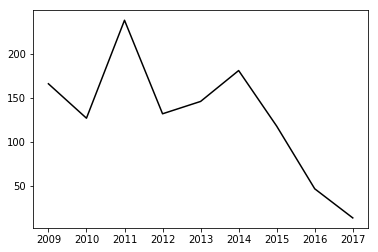

In [17]:
x = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = timeline.groupby("Year")["Text"].count().reset_index()["Text"]
plt.plot(x,y, 'k-')

## The Final Step:

There was still something missing with my analysis. I wanted to make sure that my hypothesis was correct: did I really post more positively publicly than I did privately? So far the yearly averages proved this theory. But what about my monthly averages and my weekly averages? This was the final step:

In [18]:
x_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x_days = [1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
x_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

y_year_mes = messages.groupby("Year")["compound_score"].mean()
y_month_mes = messages.groupby("Month")["compound_score"].mean()
y_day_mes = messages.groupby("Day")["compound_score"].mean()

y_year_time = timeline.groupby("Year")["compound_score"].mean()
y_month_time = timeline.groupby("Month")["compound_score"].mean()
y_day_time = timeline.groupby("Day")["compound_score"].mean()

trace1_messages_year = Scatter(
    x=x_years, y=y_year_mes,
    line=Line(
        color='#3b5998',
        width=3
    ),
    name='Messages-Year',
    visible=True
)

trace1_timeline_year = Scatter(
    x=x_years, y=y_year_time,
    line=Line(
        color='#FFA500',
        width=3
    ),
    name='Timeline-Year',
    visible=True
)


trace2_messages_month = Scatter(
    x=x_months, y=y_month_mes,
    line=Line(
        color='#3b5998',
        width=3
    ),
    name='Messages-Month',
    visible=False
)

trace2_timeline_month = Scatter(
    x=x_months, y=y_month_time,
    line=Line(
        color='#FFA500',
        width=3
    ),
    name='Timeline-Month',
    visible=False
)

trace3_messages_day = Scatter(
    x=x_days, y=y_day_mes,
    line=Line(
        color='#3b5998',
        width=3
    ),
    name='Messages-Day',
    visible=False
)

trace3_timeline_day = Scatter(
    x=x_days, y=y_day_time,
    line=Line(
        color='#FFA500',
        width=3
    ),
    name='Timeline-Day',
    visible=False
)

data = Data([trace1_messages_year, trace1_timeline_year, trace2_messages_month, trace2_timeline_month, trace3_messages_day, trace3_timeline_day])
layout = Layout(
    title='Messages Sentiment Analysis',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, False, False, False, False]],
                    label='Year',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, True, False, False]],
                    label='Month',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, True, True]],
                    label='Day',
                    method='restyle'
                )
            ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig)

# Final Analysis

This proved my theory. My timeline was more positive than my messages for:
- 83% of the time yearly
- 75% of the time monthly
- 93% of the time daily

A few outliers in the data created more variance in my messages while the sheer size of the messages versus the timeline posts (shown in my error bars on the annual average chart) created more variance in my timeline data.

Overall, through this process I learned a lot about my personal sharing and social media habits as well as the general shift in the way that people use Facebook. I realized that I did start to inflate my public posts to be more positive when Facebook became more of a social ranking platform. Now I can take this analysis and apply it to my everyday life. Is social media my way of perpetuating who I want to be seen as to my peers? I definitely think so. Since I deleted my Facebook, I can't say that I'll be able to change my posting habits now. But, I do know that I will be more vigilant, transparent, and honest when I post on other social media platforms from now on.

In [19]:
#I used pickle again to dump the updated dataframes with the VADER scores attached for reference in other notebooks
pickle.dump(messages, open("messages_score.pkl", "wb"))
pickle.dump(timeline, open("timeline_score.pkl", "wb"))

##### Citations:
"""
If you use the VADER sentiment analysis tools, please cite:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
"""